In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from NEOPRENE.NSRP.HiperParams import Calibration as Calhps, Simulation as Simhps
from NEOPRENE.NSRP.Calibration import Calibration
from NEOPRENE.NSRP.Statistics import Statistics
from NEOPRENE.NSRP.Simulation import Simulation
from NEOPRENE.NSRP.Analysis import Analysis

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
Serie_PD = pd.read_csv('auxiliary-materials/Point_Daily.csv', sep=";", decimal=".", index_col=0, parse_dates=True)
Serie_PD[Serie_PD.values<0] = np.nan
Input_Serie = pd.DataFrame(index=Serie_PD.index)
Input_Serie['Rain'] = Serie_PD.values

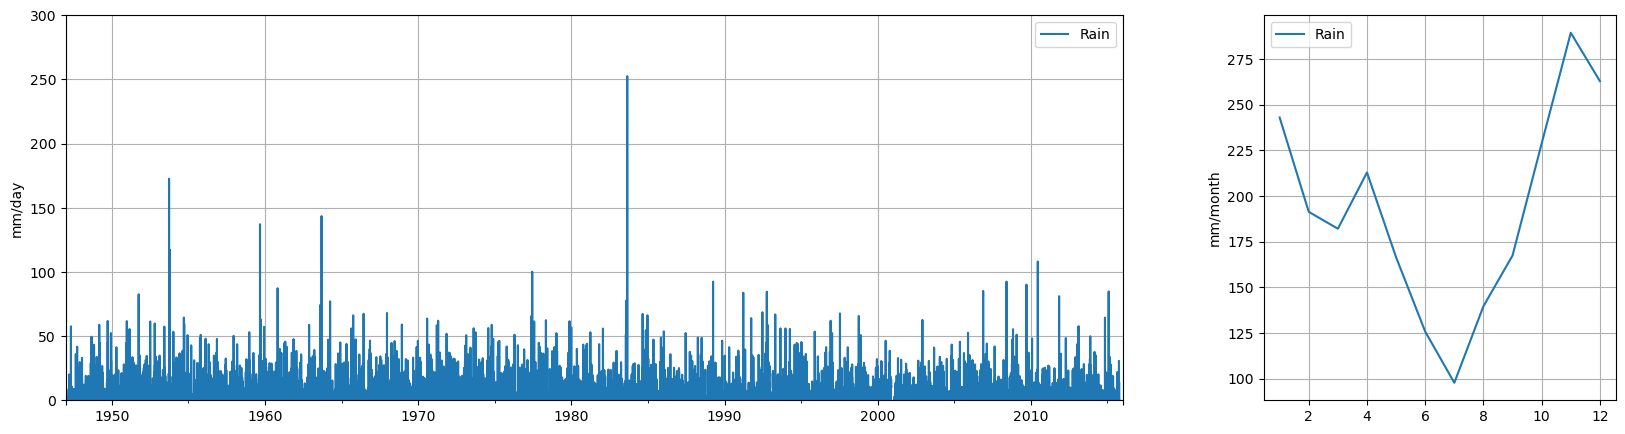

In [20]:
f, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(20, 5))

t1=str(Input_Serie.index.year[0])
t2=str(Input_Serie.index.year[-1])
Input_Serie.plot(xlim=(t1, t2),  ylim=(0, 300), ax = ax0)
ax0.grid(True)
ax0.set_ylabel('mm/day')

grouped_m = Input_Serie.groupby(lambda x: x.month)
Month_sum = grouped_m.sum()*24/(len(Input_Serie>=0)/30)
Month_sum.plot(ax = ax1)
ax1.grid(True)
ax1.set_ylabel('mm/month');

In [21]:
# Reading hiperparamteres for the calibration
hiper_params_cal = Calhps('./Input_Cal_PD.yml')

In [22]:
# Input statistics calculated from a Rainfall serie
statistics_model_1 = Statistics(hiper_params_cal, time_series = Input_Serie)

# Input statistics from file 
#statistics_model_2 = Statistics(hiper_params_cal, file = 'auxiliary-materials/statististics_PD.csv')

In [23]:
CAL              = Calibration(hiper_params_cal) 
CAL1             = CAL(statistics_model_1, verbose=False)
#CAL2             = CAL(statistics_model_2, verbose=False)

os.makedirs('./POINT_DAILY/CAL1/',exist_ok=True)

CAL1.save_files('./POINT_DAILY/CAL1/')
#CAL2.save_files('./CAL2/')

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=1005310, Mon Sep  9 21:40:57 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 7.399894353770195e+20 1.0e+00 4.91e-01  4e-01  5e-01 0:00.0
    2     16 2.141364744824230e+19 1.2e+00 6.30e-01  4e-01  7e-01 0:00.0
    3     24 1.077895223849566e+18 1.4e+00 7.80e-01  4e-01  8e-01 0:00.0
  100    800 9.907443187321262e+02 2.3e+02 2.75e+00  8e-02  6e+00 0:00.4
  200   1600 1.694788800395420e+00 1.8e+03 6.16e-01  9e-04  9e-01 0:00.7
  300   2400 1.313163600338154e+00 8.2e+03 3.53e+00  1e-03  2e+00 0:01.0
  400   3200 1.884983897814889e-01 7.2e+03 2.08e+01  2e-03  8e-01 0:01.4
  500   4000 1.611395994445963e-02 2.9e+04 9.35e+00  2e-04  7e-02 0:01.7
  600   4800 1.581747097462010e-02 3.1e+04 3.73e+01  9e-05  4e-02 0:02.1
  700   5600 1.557089204783566e-02 2.3e+04 2.14e+02  7e-05  4e-02 0:02.4
  800   6400 1.542892534514947e-02 2.0e+04 1.75e+03  1e-04  5e-02 0:02.8
  900   7200 1.532538227903733e-02

In [24]:
# Reading hiperparamteres for the simulation
hiper_params_sim = Simhps('./Input_Sim_PD.yml')

In [25]:
SIM              = Simulation(hiper_params_sim) 

# Input parameters from the model
SIM1             = SIM(params_cal = CAL1)

# Input parameters from a dataframe

os.makedirs('./POINT_DAILY/SIM1/',exist_ok=True)
SIM1.save_files('./POINT_DAILY/SIM1/')

#SIM2             = SIM(params_cal = './CAL2/Calibrated_parameters.csv')
#SIM2.save_files('./SIM1/')



################################################################################
Synthetic simulation


Total cumulative rainfall - Analytical estimation =        96828.45
Total cumulative rainfall -             Simulated =        96503.95


In [26]:
Analysis_results = Analysis(CAL1,SIM1)

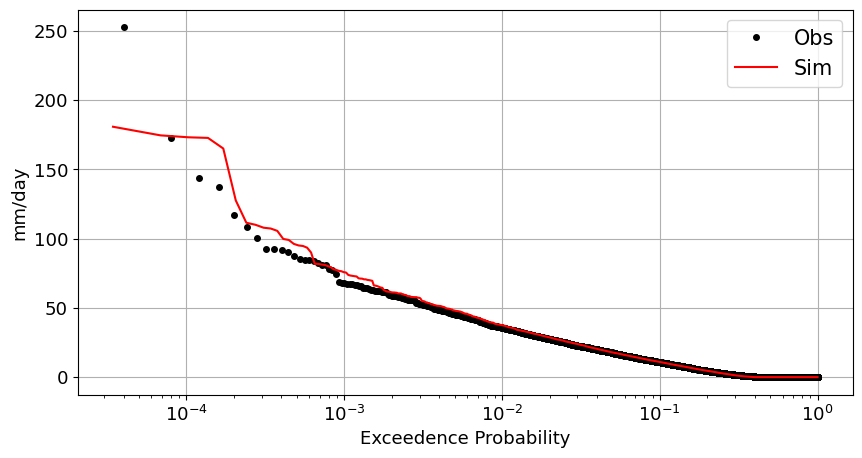

In [27]:
# Comparing exceedence Probability betwen Observed and Simulated series
Analysis_results.exceedence_probability_fig(Input_Serie, SIM1.Daily_Simulation)

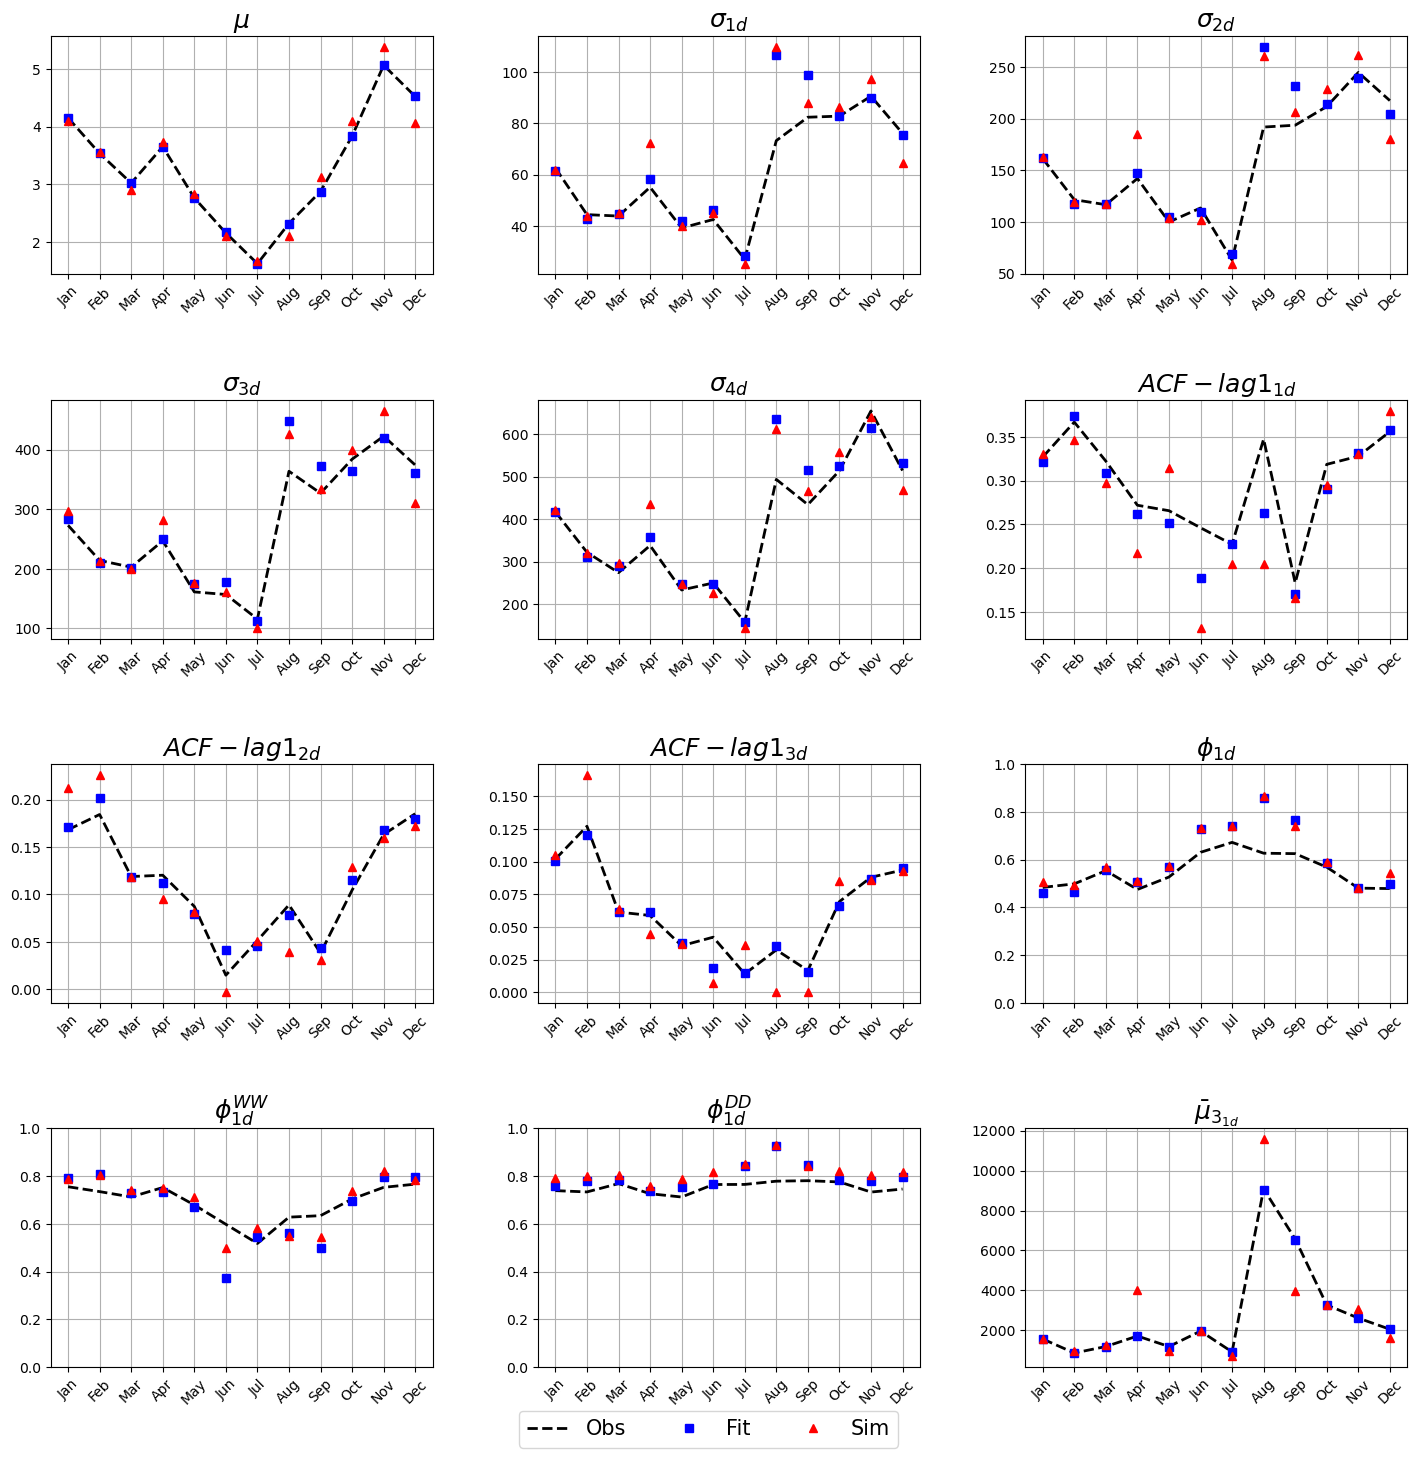

In [28]:
# Comparing the values of the statistcs (observed, fitted and simulated).
Analysis_results.compare_statistics_fig()